In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("ayushimishra2809/movielens-dataset")

print("Path to dataset files:", path)

# List the contents of the downloaded directory to confirm the presence of movies.csv
print("Files in the downloaded directory:", os.listdir(path))


100%|██████████| 875k/875k [00:00<00:00, 1.28MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushimishra2809/movielens-dataset/versions/1
Files in the downloaded directory: ['ratings.csv', 'movies.csv']


In [ ]:
 #  If movies.csv is present in the downloaded directory, use the correct path based on the output of os.listdir(path)
import pandas as pd
df_movies = pd.read_csv(os.path.join(path, "movies.csv"))
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
import pandas as pd
df_ratings = pd.read_csv(path + '/ratings.csv')
print(df_ratings.head())

   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [ ]:
df_movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [ ]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [ ]:
df_movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [ ]:
df_ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
# Assuming 'genres' is the column with list values, adjust if necessary.
df_movies['genres'] = df_movies['genres'].apply(tuple)

# Now check for duplicates
movies_dup = df_movies.duplicated()
if movies_dup.any():
    print(f"{movies_dup.sum()} duplicate(s) present in the movies dataset:")
    print(df_movies[movies_dup])
else:
    print("No duplicates in the movies dataset.")

No duplicates in the movies dataset.


In [ ]:
# Checking for duplicate rows in ratings dataset
ratings_dup = df_ratings.duplicated()
if ratings_dup.any():
    print(f"{ratings_dup.sum()} duplicate(s) present in the ratings dataset:")
    print(df_ratings[ratings_dup])
else:
    print("No duplicates in the ratings dataset.")

No duplicates in the ratings dataset.


In [ ]:
# Checking for duplicate movie titles in movies dataset
dup_movietitles = df_movies['title'].duplicated()
if dup_movietitles.any():
    print(f"{dup_movietitles.sum()} duplicate title(s) present in the movies dataset:")
    print(df_movies[dup_movietitles])
else:
    print("No duplicate titles in the movies dataset.")

2 duplicate title(s) present in the movies dataset:
      movieId                     title  \
6270    26982      Men with Guns (1997)   
7963    64997  War of the Worlds (2005)   

                                       genres  
6270                          (D, r, a, m, a)  
7963  (A, c, t, i, o, n, |, S, c, i, -, F, i)  


In [ ]:
df_movies[df_movies['title']=='Men with Guns (1997)']

,movieId,title,genres
1403,1788,Men with Guns (1997),"(A, c, t, i, o, n, |, D, r, a, m, a)"
6270,26982,Men with Guns (1997),"(D, r, a, m, a)"


In [ ]:
[df_movies[df_movies['title']=='War of the Worlds (2005)']]

[      movieId                     title  \
 6662    34048  War of the Worlds (2005)   
 7963    64997  War of the Worlds (2005)   
 
                                                  genres  
 6662  (A, c, t, i, o, n, |, A, d, v, e, n, t, u, r, ...  
 7963            (A, c, t, i, o, n, |, S, c, i, -, F, i)  ]

In [ ]:
# Dropping Duplicate movie titles from the movie dataset
df_movies.drop(df_movies.loc[df_movies['movieId']==26982].index,inplace = True)
df_movies.drop(df_movies.loc[df_movies['movieId']==64997].index,inplace = True)

In [ ]:
df_movies.describe()

,movieId
count,10327.000000
mean,31921.558923
std,37736.960408
min,1.000000
25%,3239.000000
50%,7087.000000
75%,59875.000000
max,149532.000000


In [ ]:
df_movies.nunique()

,0
movieId,10327
title,10327
genres,938


In [ ]:
df_ratings.nunique()

,0
userId,668
movieId,10325
rating,10
timestamp,84686


In [ ]:
#Total number of movies
print(f"Total number of movies: {df_movies['movieId'].value_counts().sum()}")

Total number of movies: 10327


In [ ]:
print(f"Average rating: {df_ratings['rating'].mean()}")

Average rating: 3.5168503593161127


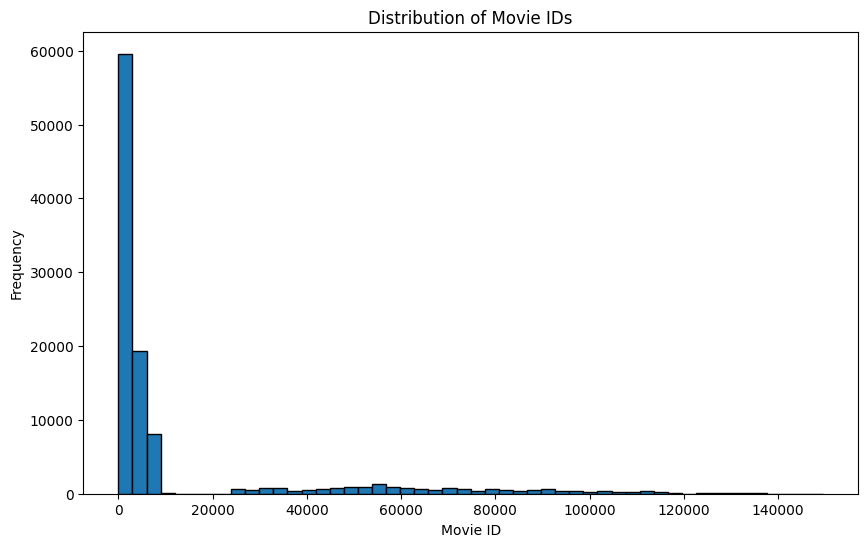

In [ ]:

# Visualize the distribution of movie IDs
plt.figure(figsize=(10, 6))
plt.hist(df_ratings['movieId'], bins=50, edgecolor='black')
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.title('Distribution of Movie IDs')
plt.show()

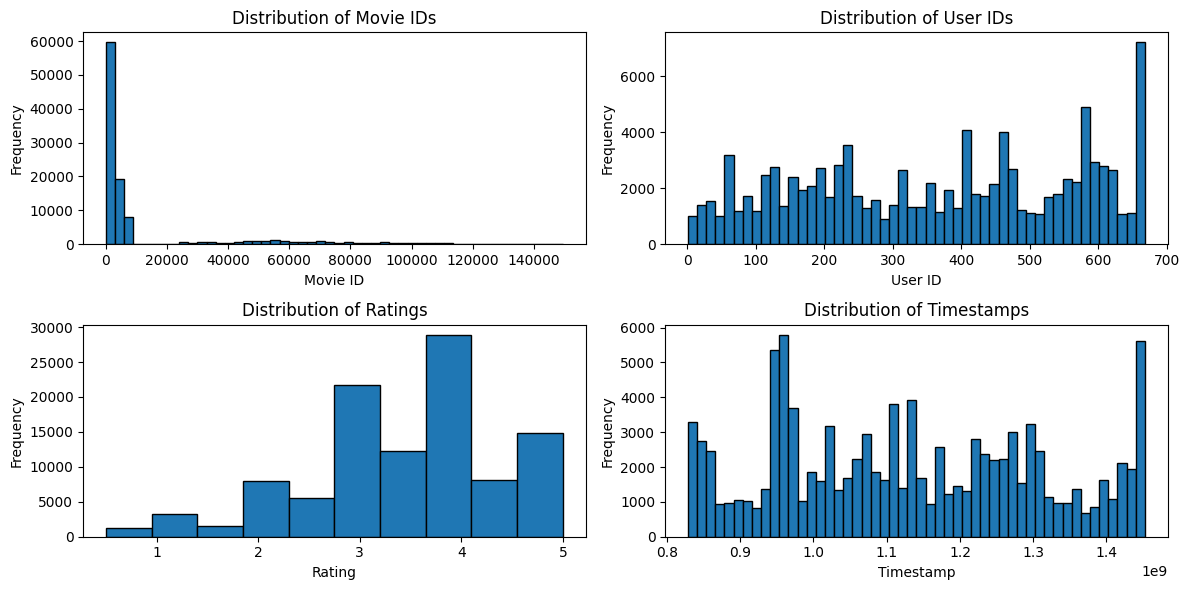

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_ratings is your DataFrame with 'userId', 'movieId', 'rating', and 'timestamp' columns

plt.figure(figsize=(12, 6))

# MovieID distribution
plt.subplot(2, 2, 1)
plt.hist(df_ratings['movieId'], bins=50, edgecolor='black')
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.title('Distribution of Movie IDs')

# UserID distribution
plt.subplot(2, 2, 2)
plt.hist(df_ratings['userId'], bins=50, edgecolor='black')  # Adjust bins as needed
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.title('Distribution of User IDs')

# Rating distribution
plt.subplot(2, 2, 3)
plt.hist(df_ratings['rating'], bins=10, edgecolor='black')  # Rating is likely discrete
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Timestamp distribution (you might want a different visualization for time)
plt.subplot(2, 2, 4)
plt.hist(df_ratings['timestamp'], bins=50, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Distribution of Timestamps')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
import seaborn as sns

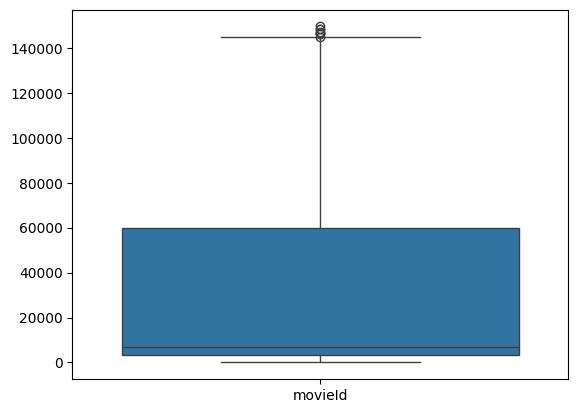

In [ ]:
sns.boxplot(data = df_movies)
plt.show()

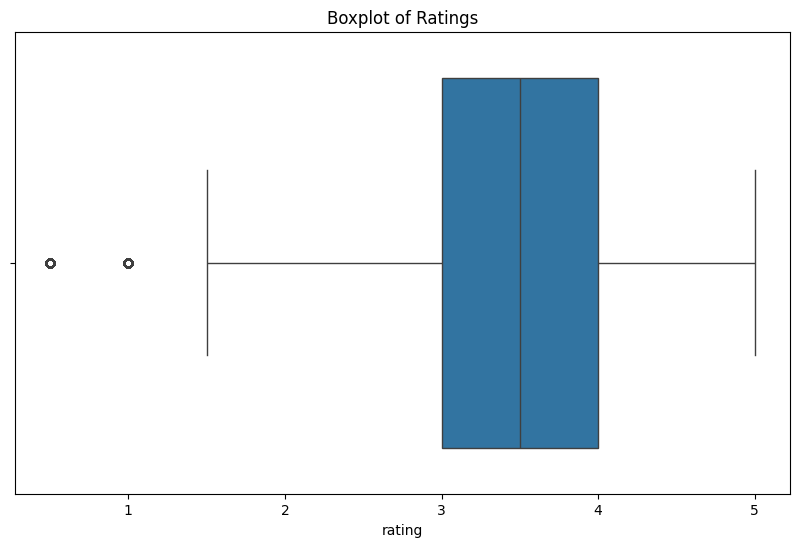

In [ ]:
# Assuming you want boxplots for specific numerical columns in df_ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=df_ratings)
plt.title('Boxplot of Ratings')
plt.show()

In [ ]:
# Function to clean each row
def clean_genres(row):
    # Check if the row is a tuple
    if isinstance(row, tuple):
        # If it's a tuple, join its elements as strings
        # Assuming the tuple elements are strings or can be converted to strings
        return ''.join(str(item).replace('(', '').replace(')', '') for item in row)
    else:
        # If it's not a tuple (e.g., a string), apply the original cleaning
        return ''.join(row.replace('(', '').replace(')', '').split(', '))

# Replace 'genres' with the actual column name if different
# For example, if the column is named 'Genres', use:
# df_movies['new_genres'] = df_movies['Genres'].apply(clean_genres)
# Assuming the column name is indeed 'genres'
if 'genres' in df_movies.columns: # Check if 'genres' column exists before proceeding
    df_movies['new_genres'] = df_movies['genres'].apply(clean_genres)
else:
    print("Column 'genres' not found in the DataFrame. Please check your data.")

# Display the cleaned data
print(df_movies[['genres', 'new_genres']]) # Changed df to df_movies

                                                  genres  \
0      (A, d, v, e, n, t, u, r, e, |, A, n, i, m, a, ...   
1      (A, d, v, e, n, t, u, r, e, |, C, h, i, l, d, ...   
2             (C, o, m, e, d, y, |, R, o, m, a, n, c, e)   
3      (C, o, m, e, d, y, |, D, r, a, m, a, |, R, o, ...   
4                                     (C, o, m, e, d, y)   
...                                                  ...   
10324  (A, n, i, m, a, t, i, o, n, |, C, h, i, l, d, ...   
10325                                 (C, o, m, e, d, y)   
10326                                 (C, o, m, e, d, y)   
10327                                    (D, r, a, m, a)   
10328  ((, n, o,  , g, e, n, r, e, s,  , l, i, s, t, ...   

                                        new_genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4             

In [ ]:
df_movies.drop(columns=['genres'],inplace=True)


In [ ]:
genres=[]
# Use the new column name 'new_genres' instead of 'genres'
for new_genres in df_movies.new_genres:

    x=new_genres.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in df_movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

display_genre=WordCloud(width=1500,height=800,background_color='pink',min_font_size=2
                    ,min_word_length=3).generate(genres)

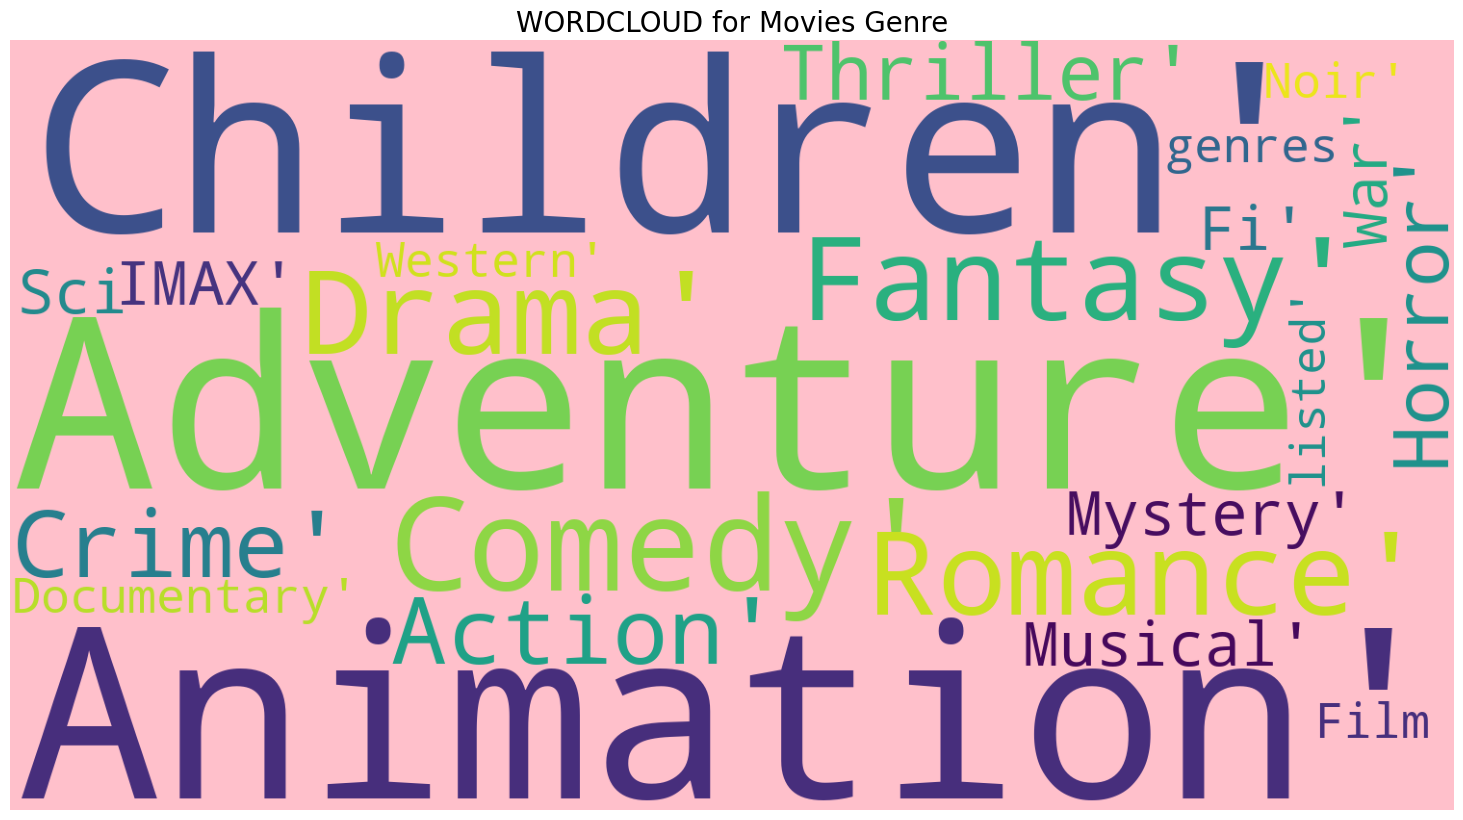

In [ ]:
plt.figure(figsize=(25,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=20)
plt.imshow(display_genre)

In [ ]:
df_movies_ratings = pd.merge(df_ratings,df_movies,on='movieId')
df_movies_ratings.drop('timestamp', axis=1, inplace=True)
df_movies_ratings

,userId,movieId,rating,title,new_genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
105329,668,142488,4.0,Spotlight (2015),Thriller
105330,668,142507,3.5,Pawn Sacrifice (2015),Drama
105331,668,143385,4.0,Bridge of Spies (2015),Drama|Thriller
105332,668,144976,2.5,Bone Tomahawk (2015),Horror|Western


In [ ]:
df_movies_ratings.drop_duplicates(inplace=True)

In [ ]:
df_movies.head()

,movieId,title,new_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movies_ratings.head()

,userId,movieId,rating,title,new_genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
df_movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105334 entries, 0 to 105333
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   userId      105334 non-null  int64  
 1   movieId     105334 non-null  int64  
 2   rating      105334 non-null  float64
 3   title       105334 non-null  object 
 4   new_genres  105334 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_movies_ratings.describe()

,userId,movieId,rating
count,105334.000000,105334.000000,105334.000000
mean,364.916475,13379.584180,3.516880
std,197.487373,26169.561127,1.044878
min,1.000000,1.000000,0.500000
25%,192.000000,1073.000000,3.000000
50%,383.000000,2496.000000,3.500000
75%,557.000000,5991.000000,4.000000
max,668.000000,149532.000000,5.000000


In [ ]:
movies_ranking = df_movies_ratings[['title','rating']].groupby('title').sum().sort_values('rating',ascending=False)

In [ ]:
movies_ranking.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


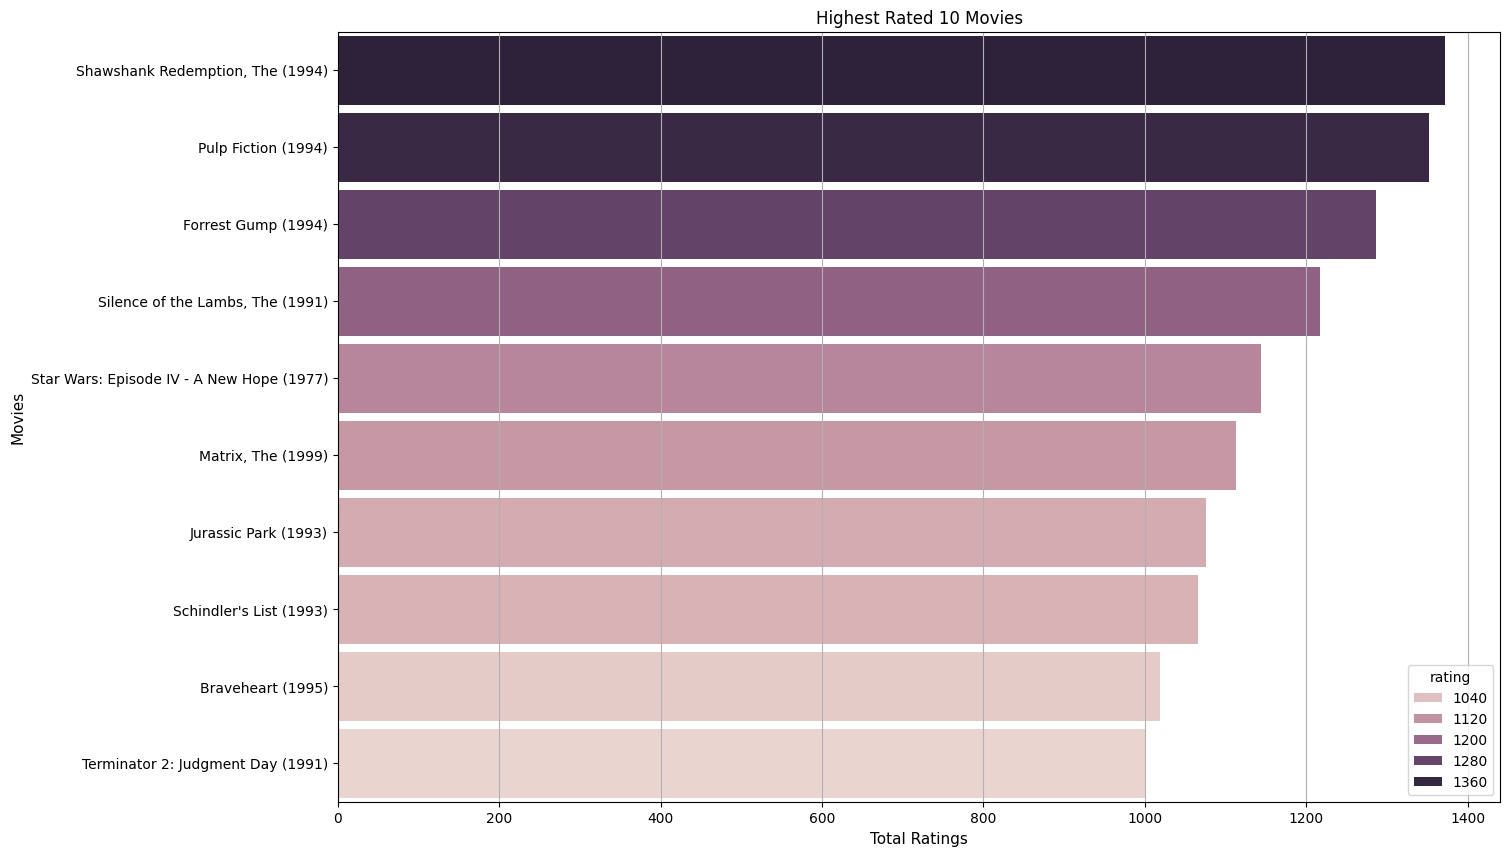

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=movies_ranking.head(10), x='rating', y=movies_ranking.head(10).index, hue='rating', orient='h', width=.9)
plt.title("Highest Rated 10 Movies")
plt.xlabel("Total Ratings", fontsize=11)
plt.ylabel("Movies", fontsize=11)
plt.grid(True, axis='x')
plt.show()

In [ ]:
#Count the ratings of all movies
ratings_count = pd.DataFrame(df_movies_ratings.groupby('title')['rating'].count().sort_values(ascending=False))
ratings_count.head(10)

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290
Star Wars: Episode IV - A New Hope (1977),273
"Matrix, The (1999)",261
Terminator 2: Judgment Day (1991),253
Braveheart (1995),248


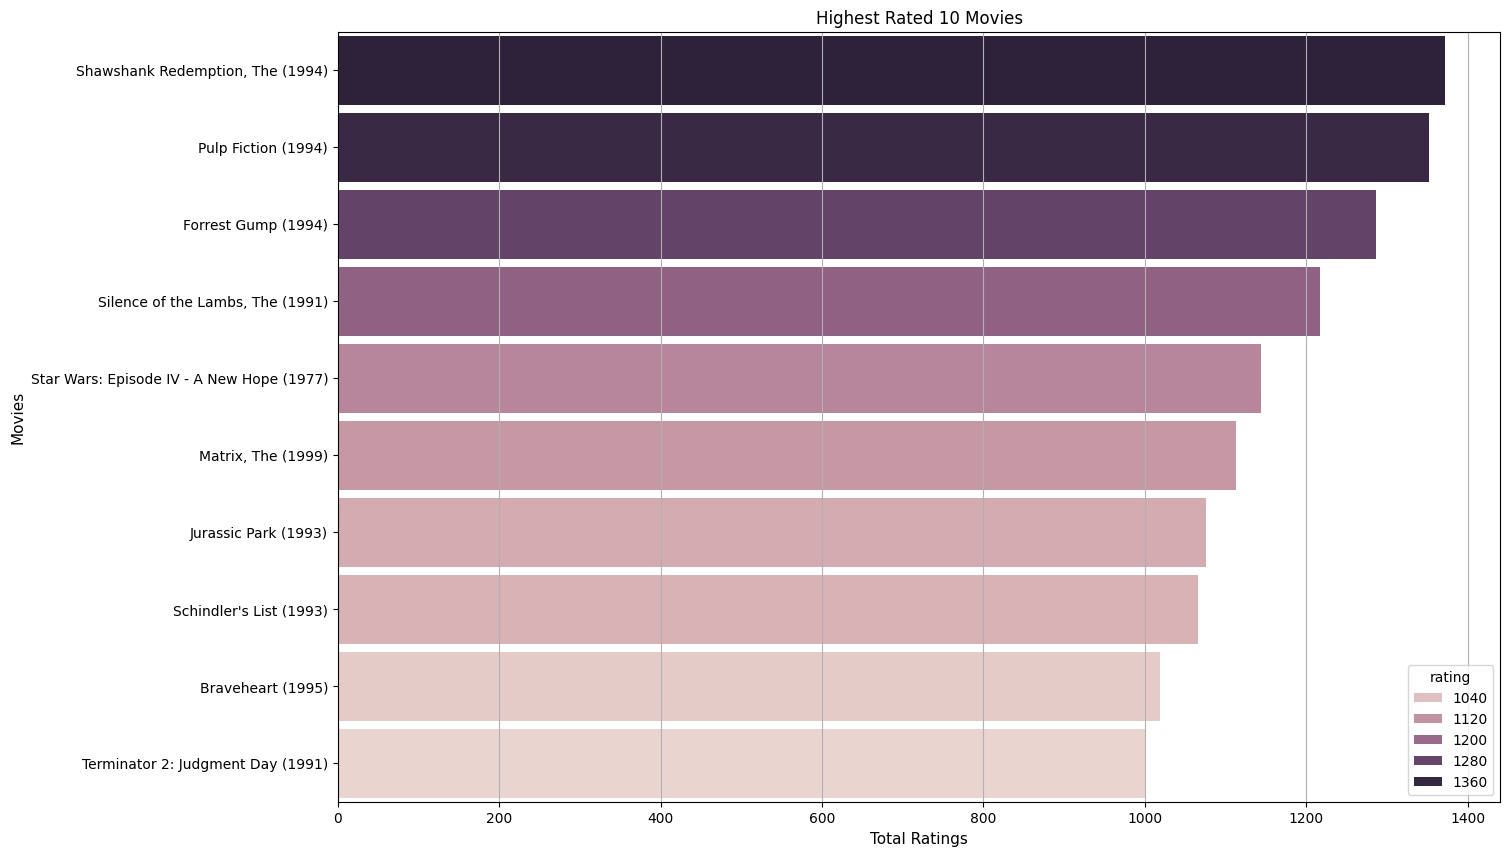

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=movies_ranking.head(10), x='rating', y=movies_ranking.head(10).index, hue='rating', orient='h', width=.9)
plt.title("Highest Rated 10 Movies")
plt.xlabel("Total Ratings", fontsize=11)
plt.ylabel("Movies", fontsize=11)
plt.grid(True, axis='x')
plt.show()

In [ ]:
movie_ratings = pd.DataFrame(df_movies_ratings.groupby('title')['rating'].mean())
movie_ratings['Number of Ratings'] = pd.DataFrame(df_movies_ratings.groupby('title')['rating'].count())
movie_ratings.head(10)

,rating,Number of Ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.932432,37
*batteries not included (1987),3.318182,11
...And Justice for All (1979),3.650000,10


In [ ]:
movie_ratings.sort_values('Number of Ratings', ascending = False).head(5)

,rating,Number of Ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290


<ipython-input-45-b2a266c1a37f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df2.head(5).index, x="Number of Ratings", data=df2.head(5), orient='h', palette="coolwarm", saturation=0.75,


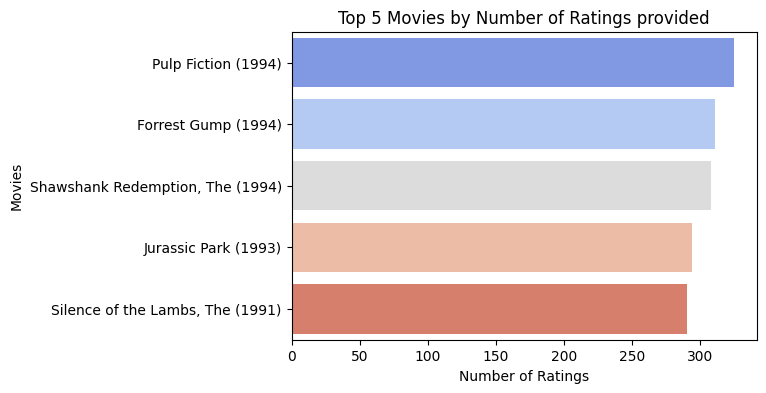

In [ ]:
df2 = movie_ratings.sort_values('Number of Ratings', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(y=df2.head(5).index, x="Number of Ratings", data=df2.head(5), orient='h', palette="coolwarm", saturation=0.75,
                 dodge=False)

plt.xlabel("Number of Ratings")
plt.ylabel("Movies")
plt.title("Top 5 Movies by Number of Ratings provided")
plt.show()

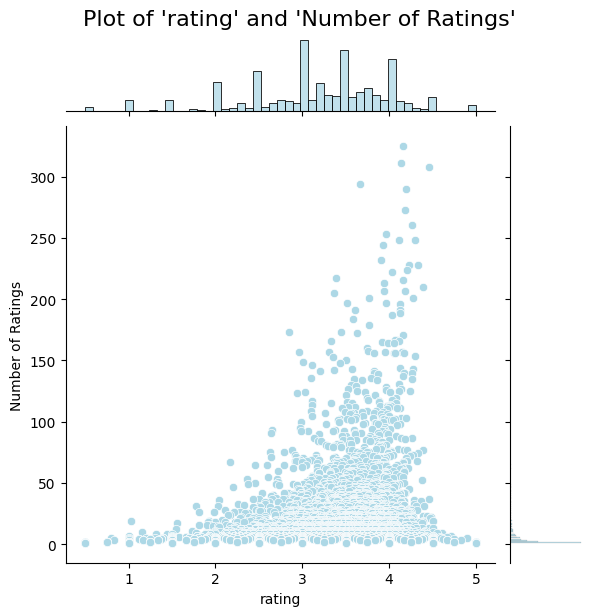

In [ ]:
sns.jointplot(x='rating', y='Number of Ratings', data=df2, kind='scatter', color='lightblue')
plt.suptitle("Plot of 'rating' and 'Number of Ratings'", y=1.02, fontsize=16)
plt.show()

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10327 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     10327 non-null  int64 
 1   title       10327 non-null  object
 2   new_genres  10327 non-null  object
dtypes: int64(1), object(2)
memory usage: 322.7+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
df_merged=pd.merge(df_ratings,df_movies, how='left',on='movieId')
df_merged.head()

,userId,movieId,rating,timestamp,title,new_genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
df_user = df_merged.pivot_table(index='userId',columns='title',values='rating')
df_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df_movies['new_genres'])


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices=pd.Series(df_movies.index,index=df_movies['title'])
titles=df_movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
recommendations('Toy Story (1995)')

,title
1815,Antz (1998)
2496,Toy Story 2 (1999)
2967,"Adventures of Rocky and Bullwinkle, The (2000)"
3166,"Emperor's New Groove, The (2000)"
3811,"Monsters, Inc. (2001)"
6617,DuckTales: The Movie - Treasure of the Lost La...
6997,"Wild, The (2006)"
7382,Shrek the Third (2007)
7987,"Tale of Despereaux, The (2008)"
9215,Asterix and the Vikings (Astérix et les Viking...


In [ ]:
# prompt: give sorted recommendations based on user ratings

def sorted_recommendations(title, num_recommendations=10):
    """
    Provides sorted recommendations based on user ratings.

    Args:
        title: The title of the movie for which recommendations are needed.
        num_recommendations: The number of recommendations to return (default is 10).

    Returns:
        A pandas Series of recommended movie titles, sorted by predicted rating.
    """

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]  # Adjust slicing for the desired number of recommendations

    movie_indices = [i[0] for i in sim_scores]
    recommended_titles = titles.iloc[movie_indices]

    # Predict ratings (replace with your actual rating prediction method)
    predicted_ratings = []
    for movie_index in movie_indices:
        # Replace this placeholder with your rating prediction logic
        predicted_ratings.append(df_movies_ratings[df_movies_ratings['title'] == titles.iloc[movie_index]]['rating'].mean())

    # Create a DataFrame for sorting
    recommendations_df = pd.DataFrame({'title': recommended_titles, 'predicted_rating': predicted_ratings})

    # Sort by predicted ratings
    recommendations_df = recommendations_df.sort_values('predicted_rating', ascending=False)

    return recommendations_df['title']  # Return sorted recommendations

# Example usage:
sorted_recommendations('Toy Story (1995)', 10) # Get top 5 recommendations

,title
2496,Toy Story 2 (1999)
3811,"Monsters, Inc. (2001)"
3166,"Emperor's New Groove, The (2000)"
1815,Antz (1998)
6617,DuckTales: The Movie - Treasure of the Lost La...
7382,Shrek the Third (2007)
7987,"Tale of Despereaux, The (2008)"
9215,Asterix and the Vikings (Astérix et les Viking...
2967,"Adventures of Rocky and Bullwinkle, The (2000)"
6997,"Wild, The (2006)"


In [ ]:
recommendations_series = sorted_recommendations('Toy Story (1995)', num_recommendations=10)

# Convert the pandas Series to a list
movies_list = recommendations_series.to_list()

# Filter the DataFrame to get ratings for these specific movies
filtered_ratings = df_movies_ratings[df_movies_ratings['title'].isin(movies_list)]

# Group by 'title' to get the average rating for each movie
avg_ratings = filtered_ratings.groupby('title')['rating'].mean().reset_index()

# Rename columns for clarity
user_ratings = avg_ratings.rename(columns={"title": "Title", "rating": "Average Rating"})

# Display the average ratings
print(user_ratings)

                                               Title  Average Rating
0     Adventures of Rocky and Bullwinkle, The (2000)        2.437500
1                                        Antz (1998)        3.315789
2  Asterix and the Vikings (Astérix et les Viking...        2.500000
3  DuckTales: The Movie - Treasure of the Lost La...        3.000000
4                   Emperor's New Groove, The (2000)        3.666667
5                              Monsters, Inc. (2001)        3.879310
6                             Shrek the Third (2007)        2.833333
7                     Tale of Despereaux, The (2008)        2.500000
8                                 Toy Story 2 (1999)        3.913462
9                                   Wild, The (2006)        2.250000


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score

# Sample data: Assuming 'user_ratings' DataFrame and 'recommended_movies' list are already defined
# 'user_ratings' has columns ['title', 'rating']

# Define the threshold to consider if a movie is liked
rating_threshold = 3.5

# Ground truth: List of movies the user liked
user_liked_movies = df_merged[df_merged['rating'] > rating_threshold]['title'].tolist()

# Recommended movies (replace with your list of recommended movies)
recommended_movies = movies_list

# Create binary labels for ground truth (1 if liked, 0 if not liked)
y_true = [1 if movie in user_liked_movies else 0 for movie in recommended_movies]

# Create binary labels for predictions (assuming all recommendations are considered positive)
y_pred = [1] * len(recommended_movies)  # All recommended movies are treated as positive predictions

# Calculate precision and recall
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.60
Recall: 1.00


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py &  # Starts Streamlit in the background

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
